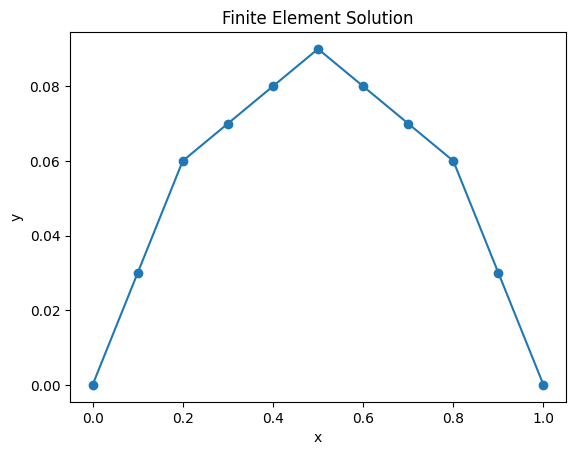

In [10]:
# Import numpy and scipy libraries
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Define the boundary value problem
# y'' + p(x)y' + q(x)y = g(x) on [a,b]
# y(a) = alpha, y(b) = beta
a = 0  # left endpoint
b = 1  # right endpoint
alpha = 0  # left boundary value
beta = 0  # right boundary value
N = 10  # number of subintervals
h = (b - a) / N  # subinterval length
x = np.linspace(a, b, N + 1)  # grid points


# Define the coefficient functions
def p(x):
    return -2 * x


def q(x):
    return 2


def g(x):
    return -4 * x * (x - 1)


# Define the basis functions
def phi(i, z):
    # Linear hat function
    if i == 0:
        return (x[i + 1] - z) / (h)
    elif i == N:
        return (z - x[i - 1]) / (h)
    else:
        return (z - x[i - 1]) / (h) + (x[i + 1] - z) / (h)


def phi_prime(i, z):
    # Derivative of linear hat function
    if i == 0:
        return -1 / h
    elif i == N:
        return 1 / h
    else:
        return -1 / h + 1 / h


# Construct the linear system
A = np.zeros((N + 1, N + 1))  # coefficient matrix
b = np.zeros(N + 1)  # right-hand side vector

# Loop over the subintervals
for i in range(N + 1):
    # Loop over the grid points
    for j in range(N + 1):
        # Compute the matrix entries using the symmetric weak form
        A[i, j] = (
            phi_prime(i, x[j]) * phi_prime(j, x[j])
            + 0.5 * (p(x[i]) + p(x[j])) * phi_prime(i, x[j]) * phi(j, x[j])
            + 0.5 * (q(x[i]) + q(x[j])) * phi(i, x[j]) * phi(j, x[j])
        )
        # Apply the boundary conditions
        if i == 0:
            A[i, j] = 0
            if j == 0:
                A[i, j] = 1
        elif i == N:
            A[i, j] = 0
            if j == N:
                A[i, j] = 1
    # Compute the right-hand side entries
    b[i] = g(x[i]) * phi(i, x[i])
    # Apply the boundary conditions
    if i == 0:
        b[i] = alpha
    elif i == N:
        b[i] = beta

# Convert A to a sparse matrix
A = diags(A.diagonal()) + diags(A.diagonal(1), 1) + diags(A.diagonal(-1), -1)

# Solve the linear system
y = spsolve(A, b)

# Print the solution
# print("The solution is:")


# Plot the solution
plt.figure()
plt.plot(x, y, "o-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Finite Element Solution")
plt.show()

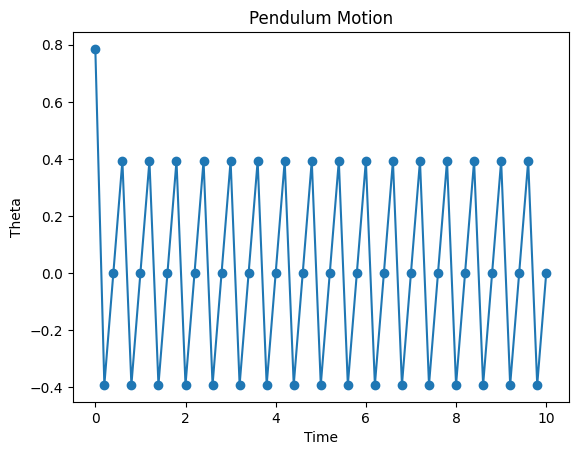

In [13]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Define the pendulum parameters
g = 9.81  # acceleration due to gravity
L = 1.0  # length of the pendulum

# Define the boundary value problem
# d^2(theta)/dt^2 + g/L * sin(theta) = 0
# Initial conditions: theta(0) = alpha, d(theta)/dt(0) = beta
alpha = np.pi / 4  # initial angle
beta = 0.0  # initial angular velocity

# Discretization parameters
a = 0  # start time
b = 10  # end time
N = 50  # number of subintervals
h = (b - a) / N  # time step
t = np.linspace(a, b, N + 1)  # time grid


# Define the basis functions
def phi(i, z):
    # Linear hat function
    if i == 0:
        return (t[i + 1] - z) / h
    elif i == N:
        return (z - t[i - 1]) / h
    else:
        return (z - t[i - 1]) / h + (t[i + 1] - z) / h


def phi_prime(i, z):
    # Derivative of linear hat function
    if i == 0:
        return -1 / h
    elif i == N:
        return 1 / h
    else:
        return -1 / h + 1 / h


# Construct the linear system
A = np.zeros((N + 1, N + 1))  # coefficient matrix
b = np.zeros(N + 1)  # right-hand side vector

# Loop over the subintervals
for i in range(N + 1):
    # Loop over the grid points
    for j in range(N + 1):
        # Compute the matrix entries using the symmetric weak form
        A[i, j] = phi_prime(i, t[j]) * phi_prime(j, t[j]) + (g / L) * np.sin(
            phi(i, t[j])
        ) * phi(j, t[j])
        # Apply the initial conditions
        if i == 0:
            A[i, j] = 0
            if j == 0:
                A[i, j] = 1
        # Compute the right-hand side entries
        b[i] = -beta * phi_prime(i, t[i])
        # Apply the initial conditions
        if i == 0:
            b[i] = alpha

# Convert A to a sparse matrix
A = diags(A.diagonal()) + diags(A.diagonal(1), 1) + diags(A.diagonal(-1), -1)

# Solve the linear system
theta = spsolve(A, b)

# Print the solution
# print("The solution is:", theta)

# Plot the solution
plt.figure()
plt.plot(t, theta, "o-")
plt.xlabel("Time")
plt.ylabel("Theta")
plt.title("Pendulum Motion")
plt.show()

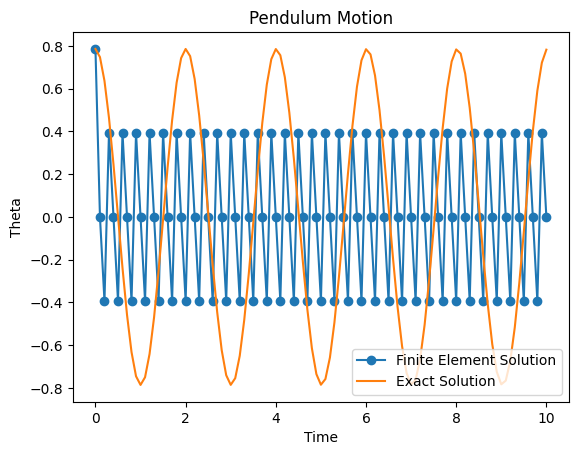

In [15]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Define the pendulum parameters
g = 9.81  # acceleration due to gravity
L = 1.0  # length of the pendulum


# Define the exact solution for comparison
def exact_solution(t, theta_0):
    omega = np.sqrt(g / L)
    return theta_0 * np.cos(omega * t)


# Define the boundary value problem
alpha = np.pi / 4  # initial angle
beta = 0.0  # initial angular velocity

# Discretization parameters
a = 0
b = 10
N = 100
h = (b - a) / N
t = np.linspace(a, b, N + 1)


# Define the basis functions
def phi(i, z):
    # Linear hat function
    if i == 0:
        return (t[i + 1] - z) / h
    elif i == N:
        return (z - t[i - 1]) / h
    else:
        return (z - t[i - 1]) / h + (t[i + 1] - z) / h


def phi_prime(i, z):
    # Derivative of linear hat function
    if i == 0:
        return -1 / h
    elif i == N:
        return 1 / h
    else:
        return -1 / h + 1 / h


# Construct the linear system
A = np.zeros((N + 1, N + 1))  # coefficient matrix
b = np.zeros(N + 1)  # right-hand side vector

# Loop over the subintervals
for i in range(N + 1):
    # Loop over the grid points
    for j in range(N + 1):
        # Compute the matrix entries using the symmetric weak form
        A[i, j] = phi_prime(i, t[j]) * phi_prime(j, t[j]) + (g / L) * np.sin(
            phi(i, t[j])
        ) * phi(j, t[j])
        # Apply the initial conditions
        if i == 0:
            A[i, j] = 0
            if j == 0:
                A[i, j] = 1
        # Compute the right-hand side entries
        b[i] = -beta * phi_prime(i, t[i])
        # Apply the initial conditions
        if i == 0:
            b[i] = alpha

# Convert A to a sparse matrix
A = diags(A.diagonal()) + diags(A.diagonal(1), 1) + diags(A.diagonal(-1), -1)

# Solve the linear system
theta_fe = spsolve(A, b)

# Compute the exact solution
theta_exact = exact_solution(t, alpha)

# Print the solutions
# print("Finite Element Solution:", theta_fe)
# print("Exact Solution:", theta_exact)

# Plot the solutions
plt.figure()
plt.plot(t, theta_fe, "o-", label="Finite Element Solution")
plt.plot(t, theta_exact, label="Exact Solution")
plt.xlabel("Time")
plt.ylabel("Theta")
plt.title("Pendulum Motion")
plt.legend()
plt.show()